In [1]:
# 引入所需要的全部包
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
## 创建一个时间字符串格式化字符串
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [3]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [4]:
# 加载数据
path = 'datas\household_power_consumption_200.txt' ## 200行数据
path = 'datas\household_power_consumption_1000.txt' ## 1000行数据
df = pd.read_csv(path, sep=';', low_memory=False)

# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率
names2=df.columns
names=['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# 异常数据处理(异常数据过滤)
new_df = df.replace('?', np.nan)
datas = new_df.dropna(axis=0,how = 'any') # 只要有数据为空，就进行删除操作

准确率: 0.485065781751


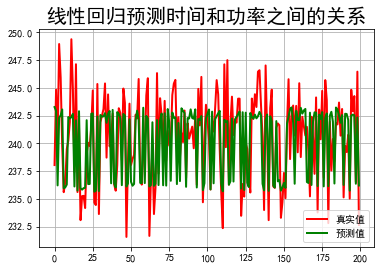

In [5]:
## 时间和电压之间的关系(Linear)
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]].values

# 对数据集进行测试集合训练集划分 
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

# 模型训练
lr = LinearRegression()
lr.fit(X_train, Y_train) ## 训练模型

# 模型校验
y_predict = lr.predict(X_test) ## 预测结果

# 模型效果
print("准确率:",lr.score(X_test, Y_test))

## 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t, Y_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, y_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测时间和功率之间的关系", fontsize=20)
plt.grid(b=True)#网格
plt.show()

1阶，系数为： [  2.39926650e+02  -1.33226763e-15  -1.33226763e-15   3.97781449e+00
   8.73334650e-01   1.70647992e-01   0.00000000e+00]
2阶，系数为： [  2.44807332e+13  -5.85937500e-03  -1.36718750e-02  -9.86418558e+12
   2.97656250e+00   2.72216797e-01  -2.53906250e-02   5.37109375e-03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -2.44807332e+13  -2.49655762e+01
  -5.10742188e-01   0.00000000e+00  -1.02233734e+01  -4.60937500e-01
   0.00000000e+00  -3.75976562e-02   0.00000000e+00   0.00000000e+00]
3阶，系数为： [  2.79277683e+12  -5.43534395e+12   1.37580046e+13  -2.47122412e+12
   2.08036202e+13   4.69546379e+12   1.88054901e+12  -2.86421683e+12
   2.24613441e+12  -9.62576939e+11  -2.90638129e+12  -2.71477105e+12
  -4.98891432e+12   6.80884730e+12  -7.43299546e+12   6.99620684e+12
   5.00291640e+12   1.87988281e-02  -2.25045956e+12  -8.38254186e+12
  -1.89197464e+12   0.000

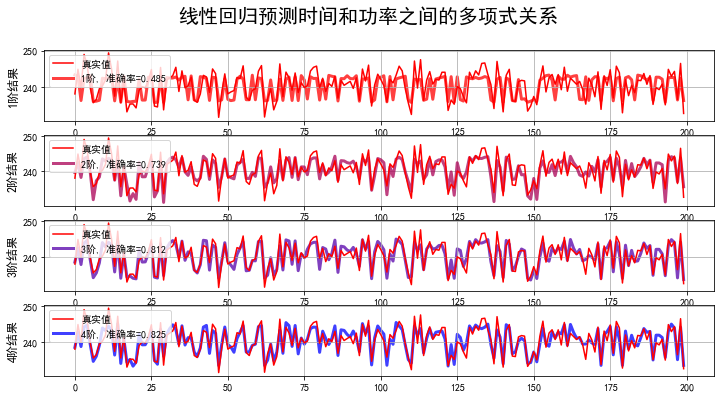

In [6]:
## 时间和电压之间的关系(Linear-多项式)
# Pipeline：管道的意思，讲多个操作合并成为一个操作
# Pipleline总可以给定多个不同的操作，给定每个不同操作的名称即可，执行的时候，按照从前到后的顺序执行
# Pipleline对象在执行的过程中，当调用某个方法的时候，会调用对应过程的对应对象的对应方法
# eg：在下面这个案例中，调用了fit方法，
# 那么对数据调用第一步操作：PolynomialFeatures的fit_transform方法对数据进行转换并构建模型
# 然后对转换之后的数据调用第二步操作: LinearRegression的fit方法构建模型
# eg: 在下面这个案例中，调用了predict方法，
# 那么对数据调用第一步操作：PolynomialFeatures的transform方法对数据进行转换
# 然后对转换之后的数据调用第二步操作: LinearRegression的predict方法进行预测
models = [
    Pipeline([
            ('Poly', PolynomialFeatures()), # 给定进行多项式扩展操作， 第一个操作：多项式扩展
            ('Linear', LinearRegression(fit_intercept=False)) # 第二个操作，线性回归
        ])
]
model = models[0]
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]]

# 对数据集进行测试集合训练集划分
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

# 模型训练
t=np.arange(len(X_test))
N = 5
d_pool = np.arange(1,N,1) # 阶
m = d_pool.size
clrs = [] # 颜色
for c in np.linspace(16711680, 255, m):
    clrs.append('#%06x' % int(c))
line_width = 3

plt.figure(figsize=(12,6), facecolor='w')#创建一个绘图窗口，设置大小，设置颜色
for i,d in enumerate(d_pool):
    plt.subplot(N-1,1,i+1)
    plt.plot(t, Y_test, 'r-', label=u'真实值', ms=10, zorder=N)
    ### 设置管道对象中的参数值，Poly是在管道对象中定义的操作名称， 后面跟参数名称；中间是两个下划线
    model.set_params(Poly__degree=d) ## 设置多项式的阶乘
    model.fit(X_train, Y_train) # 模型训练
    # Linear是管道中定义的操作名称
    # 获取线性回归算法模型对象
    lin = model.get_params('Linear')['Linear']
    output = u'%d阶，系数为：' % d
    # 判断lin对象中是否有对应的属性
    if hasattr(lin, 'alpha_'):
        idx = output.find(u'系数')
        output = output[:idx] + (u'alpha=%.6f, ' % lin.alpha_) + output[idx:]
    if hasattr(lin, 'l1_ratio_'):
        idx = output.find(u'系数')
        output = output[:idx] + (u'l1_ratio=%.6f, ' % lin.l1_ratio_) + output[idx:]
    print (output, lin.coef_.ravel())
    
    # 模型结果预测
    y_hat = model.predict(X_test)
    # 计算评估值
    s = model.score(X_test, Y_test)
    
    # 画图
    z = N - 1 if (d == 2) else 0
    label = u'%d阶, 准确率=%.3f' % (d,s)
    plt.plot(t, y_hat, color=clrs[i], lw=line_width, alpha=0.75, label=label, zorder=z)
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.ylabel(u'%d阶结果' % d, fontsize=12)

## 预测值和实际值画图比较
plt.suptitle(u"线性回归预测时间和功率之间的多项式关系", fontsize=20)
plt.grid(b=True)
plt.show()

In [7]:
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]]

# 对数据集进行测试集合训练集划分
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化, 第一步：进行标准化操作
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

# 多项式扩展，第二步：进行多项式扩展
poly = PolynomialFeatures(degree=3, interaction_only=True)
train1 = poly.fit_transform(X_train)
test1 = poly.transform(X_test)

# 模型训练， 第三步：进行模型训练
linear = LinearRegression(fit_intercept=False)
linear.fit(train1, Y_train)
print(linear.score(test1, Y_test))
print(linear.coef_)
print(linear.intercept_)

0.647434206269
[  2.34747962e+02   8.16006324e+13   3.29853751e+13   7.91208328e+00
   2.82400174e+00  -1.99713778e-01   5.30797286e+13  -2.68616193e+14
   7.60971677e+13  -1.68039720e+14   1.80251736e+14  -2.07082118e+14
  -1.40597879e+14  -4.67040311e+13  -9.58289108e+12   5.46667175e+13
  -5.47656250e+00   9.37500000e-02   0.00000000e+00  -3.12500000e-02
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -4.53125000e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
0.0


# LinearRegression模型参数
fit_intercept: 训练的模型是否包含截距，默认为为True，表示包含

# LinearRegression模型属性
coef_ ：模型训练好后的参数列表 
intercept_: 截距值

# train_test_split方法参数
数据参数：第一个参数是X，第二个参数为Y；
test_size：进行数据划分的时候，测试集占用的比例
train_size: 进行数据划分的时候，训练集占用的比例
要求test_size和train_size只能给定一个
random_state: 随机数种子，所有的随机数种子如果给定的时候都是为了保证多次操作的结果是完全一致的；默认情况下的随机数种子是当前的时间

# StandardScaler模型参数
with_mean：在进行数据转换的过程中，是否将数据转换为均值为0的数据(默认为True，表示是)
with_std：在进行数据转换的过程中，是否将数据转换为标准差为1的数据(默认为True，表示是)

# StandardScaler模型的属性
mean_：均值
var_：方差

# PolynomialFeatures模型参数
degree：给定进行最高多次次幂的扩展
interaction_only: 默认为False;在多项式扩展过程中，是否考虑同一个特征的多次相乘，是否扩展x1^2或者x1^2*x2；默认为False，表示扩展；True表示不进行扩展
include_bias：默认为True，是否在多项式扩展的过程中，加入一个常数项，常数项值为1.默认加入